In [1]:
import numpy as np     #importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics

%matplotlib inline


### Train Data Loading

In [2]:
# reading the train data
# while data cleaning we found '+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-','0+AHs-' this values
# unwanted, so replacing them with NaN
d1 = pd.read_csv('chola_train.csv',na_values=['+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-','0+AHs-'])
d1.shape

C:\Users\Vedant Kale\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1048575, 17)

In [3]:
#getting insight of data and null values in it
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
ID                        1048575 non-null int64
vendor+AF8-id             1048574 non-null float64
pickup+AF8-loc            1048574 non-null float64
drop+AF8-loc              1048574 non-null float64
driver+AF8-tip            1048573 non-null object
mta+AF8-tax               1048573 non-null object
distance                  1048574 non-null float64
pickup+AF8-time           1048574 non-null object
drop+AF8-time             1048574 non-null object
num+AF8-passengers        1048574 non-null float64
toll+AF8-amount           1048573 non-null object
payment+AF8-method        1048574 non-null float64
rate+AF8-code             1048574 non-null float64
stored+AF8-flag           1048574 non-null object
extra+AF8-charges         1048574 non-null object
improvement+AF8-charge    1048573 non-null object
total+AF8-amount          1048573 non-null object
dtypes: float64(7), int64(1), o

In [4]:
d1.head()

,ID,vendor+AF8-id,pickup+AF8-loc,drop+AF8-loc,driver+AF8-tip,mta+AF8-tax,distance,pickup+AF8-time,drop+AF8-time,num+AF8-passengers,toll+AF8-amount,payment+AF8-method,rate+AF8-code,stored+AF8-flag,extra+AF8-charges,improvement+AF8-charge,total+AF8-amount
0,0,1.0,170.0,233.0,1.83,0.5,0.70,04/04/2017 05:59:43 PM,04/04/2017 06:05:04 PM,1.0,0,1.0,1.0,N,1,0.3,9.13
1,1,2.0,151.0,243.0,3.56,0.5,4.64,04/03/2017 07:03:34 PM,04/03/2017 07:20:04 PM,1.0,0,1.0,1.0,N,1,0.3,21.36
2,2,2.0,68.0,90.0,1.5,0.5,1.29,04/03/2017 03:06:13 PM,04/03/2017 03:12:30 PM,2.0,0,1.0,1.0,N,0,0.3,8.8
3,3,2.0,142.0,234.0,1.5,0.5,2.74,04/04/2017 08:10:52 AM,04/04/2017 08:27:00 AM,1.0,0,1.0,1.0,N,0,0.3,14.8
4,4,2.0,238.0,238.0,0,0.5,0.45,04/05/2017 02:02:59 PM,04/05/2017 02:05:41 PM,6.0,0,2.0,1.0,N,0,0.3,4.8


In [5]:
d1.isnull().sum()

ID                        0
vendor+AF8-id             1
pickup+AF8-loc            1
drop+AF8-loc              1
driver+AF8-tip            2
mta+AF8-tax               2
distance                  1
pickup+AF8-time           1
drop+AF8-time             1
num+AF8-passengers        1
toll+AF8-amount           2
payment+AF8-method        1
rate+AF8-code             1
stored+AF8-flag           1
extra+AF8-charges         1
improvement+AF8-charge    2
total+AF8-amount          2
dtype: int64

### Data Cleaning

In [6]:
for  col in d1.columns:
    print(col, d1[col].unique())

ID [      0       1       2 ... 1048572 1048573 1048574]
vendor+AF8-id [ 1.  2. nan]
pickup+AF8-loc [170. 151.  68. 142. 238. 230. 236. 229. 132. 114. 264. 166. 263. 137.
  90. 141. 211. 138. 164. 148. 237. 261. 234. 186. 161. 107. 140.  24.
 113.  13. 231. 143. 239. 249.  48.   4. 162. 158. 163.  79. 224. 223.
 179.  75. 125.  87. 100. 233.  12. 262. 144.  43.  74. 152.  66. 226.
 112.   7.  41. 246.  50.  88. 256. 193.  45.  65. 146.  42.  85.  34.
 209. 145. 189.  61. 232. 116.  52. 244.  80.  56.  33. 260. 181.  17.
 194. 196. 259.  37. 197. 188. 127. 255. 228. 247.  25.  93.  49. 265.
 215.  40. 198. 220. 129. 106.  82. 130.  10. 217.  97.  95. 190. 195.
  18. 167. 157.  36.  89. 219.  28. 119. 168. 208.  62. 243. 225.  92.
 169.  54. 136. 134. 242.   9.  70.   1. 124. 156. 227. 159. 207.  83.
 135.  35. 216.  73.  47. 235. 173.  26. 218. 108. 123.  91.  76. 153.
  86. 165. 111. 202. 257. 213.   8.  19. 178.  20. 160. 203. 205. 200.
 182.  69. 126. 241. 254. 101.  57. 177. 102.  7

In [7]:
# found that +AC0- is a misllaneous value adjoined with many data elements
# so replacing it with empty string
d1=d1.replace(to_replace='\+AC0\-' , value='', regex=True)

In [8]:
#checking wether the data is cleaned successfully or not
for  col in d1.columns:
    print(col, d1[col].unique())

ID [      0       1       2 ... 1048572 1048573 1048574]
vendor+AF8-id [ 1.  2. nan]
pickup+AF8-loc [170. 151.  68. 142. 238. 230. 236. 229. 132. 114. 264. 166. 263. 137.
  90. 141. 211. 138. 164. 148. 237. 261. 234. 186. 161. 107. 140.  24.
 113.  13. 231. 143. 239. 249.  48.   4. 162. 158. 163.  79. 224. 223.
 179.  75. 125.  87. 100. 233.  12. 262. 144.  43.  74. 152.  66. 226.
 112.   7.  41. 246.  50.  88. 256. 193.  45.  65. 146.  42.  85.  34.
 209. 145. 189.  61. 232. 116.  52. 244.  80.  56.  33. 260. 181.  17.
 194. 196. 259.  37. 197. 188. 127. 255. 228. 247.  25.  93.  49. 265.
 215.  40. 198. 220. 129. 106.  82. 130.  10. 217.  97.  95. 190. 195.
  18. 167. 157.  36.  89. 219.  28. 119. 168. 208.  62. 243. 225.  92.
 169.  54. 136. 134. 242.   9.  70.   1. 124. 156. 227. 159. 207.  83.
 135.  35. 216.  73.  47. 235. 173.  26. 218. 108. 123.  91.  76. 153.
  86. 165. 111. 202. 257. 213.   8.  19. 178.  20. 160. 203. 205. 200.
 182.  69. 126. 241. 254. 101.  57. 177. 102.  7

In [9]:
d1.columns

Index(['ID', 'vendor+AF8-id', 'pickup+AF8-loc', 'drop+AF8-loc',
       'driver+AF8-tip', 'mta+AF8-tax', 'distance', 'pickup+AF8-time',
       'drop+AF8-time', 'num+AF8-passengers', 'toll+AF8-amount',
       'payment+AF8-method', 'rate+AF8-code', 'stored+AF8-flag',
       'extra+AF8-charges', 'improvement+AF8-charge', 'total+AF8-amount'],
      dtype='object')

In [16]:
# there are few null values so using forward fill to replace them
d1_u1=d1
d1_u1=d1_u1.fillna(method='ffill')

### Manipulating Train Data

In [17]:
# replacing column names by removing +AF8-
d1_u1.columns = ['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge','total_amount']

In [18]:
# replacing N,Y values in stored flag wit 0,1 for ease of computation

d1_u1['stored_flag']=d1_u1['stored_flag'].replace(to_replace='N', value=0, regex=True)
d1_u1['stored_flag']=d1_u1['stored_flag'].replace(to_replace='Y', value=1, regex=True)   

In [19]:
d1_u1.isnull().sum()   #no null value left

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
total_amount          0
dtype: int64

In [20]:
# pickup_time and drop_time are object type so converting them to datetime type
d1_u1['pickup_time'] = pd.to_datetime(d1_u1['pickup_time'])
d1_u1['drop_time'] = pd.to_datetime(d1_u1['drop_time'])

# calculating time difference and adding a column time_diff
d1_u1['time_diff'] = d1_u1['drop_time']-d1_u1['pickup_time'] 
d1_u1['time_diff'] = pd.to_datetime(d1_u1['time_diff'])

C:\Users\Vedant Kale\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# converting time_diff to minutes

d1_u1['journey_duration'] = d1_u1['time_diff'].dt.hour*60 + d1_u1['time_diff'].dt.minute + (d1_u1['time_diff'].dt.second)/60 

In [22]:
# Converting object type to float for ease of computation

d1_u1['driver_tip'] = d1_u1['driver_tip'].astype('float')
d1_u1['mta_tax'] = d1_u1['mta_tax'].astype('float')
d1_u1['toll_amount'] = d1_u1['toll_amount'].astype('float')
d1_u1['extra_charges'] = d1_u1['extra_charges'].astype('float')
d1_u1['improvement_charge'] = d1_u1['improvement_charge'].astype('float')
d1_u1['total_amount'] = d1_u1['total_amount'].astype('float')

In [23]:
d1_u1['loc_diff']=d1_u1['drop_loc']-d1_u1['pickup_loc']

In [24]:
d1_u1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
ID                    1048575 non-null int64
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null float64
mta_tax               1048575 non-null float64
distance              1048575 non-null float64
pickup_time           1048575 non-null datetime64[ns]
drop_time             1048575 non-null datetime64[ns]
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null float64
payment_method        1048575 non-null float64
rate_code             1048575 non-null float64
stored_flag           1048575 non-null int64
extra_charges         1048575 non-null float64
improvement_charge    1048575 non-null float64
total_amount          1048575 non-null float64
time_diff             1048575 non-null datetime64[ns]
journey_duration      10

In [25]:
d1_u1.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,time_diff,journey_duration,loc_diff
0,0,1.0,170.0,233.0,1.83,0.5,0.70,2017-04-04 17:59:43,2017-04-04 18:05:04,1.0,0.0,1.0,1.0,0,1.0,0.3,9.13,1970-01-01 00:05:21,5.350000,63.0
1,1,2.0,151.0,243.0,3.56,0.5,4.64,2017-04-03 19:03:34,2017-04-03 19:20:04,1.0,0.0,1.0,1.0,0,1.0,0.3,21.36,1970-01-01 00:16:30,16.500000,92.0
2,2,2.0,68.0,90.0,1.50,0.5,1.29,2017-04-03 15:06:13,2017-04-03 15:12:30,2.0,0.0,1.0,1.0,0,0.0,0.3,8.80,1970-01-01 00:06:17,6.283333,22.0
3,3,2.0,142.0,234.0,1.50,0.5,2.74,2017-04-04 08:10:52,2017-04-04 08:27:00,1.0,0.0,1.0,1.0,0,0.0,0.3,14.80,1970-01-01 00:16:08,16.133333,92.0
4,4,2.0,238.0,238.0,0.00,0.5,0.45,2017-04-05 14:02:59,2017-04-05 14:05:41,6.0,0.0,2.0,1.0,0,0.0,0.3,4.80,1970-01-01 00:02:42,2.700000,0.0


### Loading Test Data

In [26]:
d2 = pd.read_csv('chola_test.csv')
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154235 entries, 0 to 154234
Data columns (total 16 columns):
ID                    154235 non-null int64
vendor_id             154235 non-null int64
pickup_loc            154235 non-null float64
drop_loc              154235 non-null float64
driver_tip            154235 non-null float64
mta_tax               154235 non-null float64
distance              154235 non-null float64
pickup_time           154235 non-null object
drop_time             154235 non-null object
num_passengers        154235 non-null float64
toll_amount           154235 non-null float64
payment_method        154235 non-null float64
rate_code             154235 non-null float64
stored_flag           154235 non-null object
extra_charges         154235 non-null float64
improvement_charge    154235 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 18.8+ MB


In [27]:
d2.isnull().sum() # No Null values, so no data cleaning required 

ID                    0
vendor_id             0
pickup_loc            0
drop_loc              0
driver_tip            0
mta_tax               0
distance              0
pickup_time           0
drop_time             0
num_passengers        0
toll_amount           0
payment_method        0
rate_code             0
stored_flag           0
extra_charges         0
improvement_charge    0
dtype: int64

### Manipulating Train Data

In [28]:
# pickup_time and drop_time are object type so converting them to datetime type

d2['pickup_time'] = pd.to_datetime(d2['pickup_time'])
d2['drop_time'] = pd.to_datetime(d2['drop_time'])

# calculating time difference and adding a column time_diff
d2['time_diff'] = d2['drop_time']-d2['pickup_time'] 
d2['time_diff'] = pd.to_datetime(d2['time_diff'])

# Converting object type to float for ease of computation
d2['journey_duration'] = d2['time_diff'].dt.hour*60 + d2['time_diff'].dt.minute + (d2['time_diff'].dt.second)/60 

In [29]:
# replacing N,Y values in stored flag wit 0,1 for ease of computation

d2['stored_flag']=d2['stored_flag'].replace(to_replace='N', value=0, regex=True)
d2['stored_flag']=d2['stored_flag'].replace(to_replace='Y', value=1, regex=True)    

In [30]:
d2['loc_diff']=d2['drop_loc']-d2['pickup_loc']

In [31]:
d2.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,time_diff,journey_duration,loc_diff
0,0,1,68.0,186.0,1.00,0.5,0.70,2017-04-05 05:49:46,2017-04-05 05:54:03,1.0,0.0,1.0,1.0,0,0.5,0.3,1970-01-01 00:04:17,4.283333,118.0
1,1,1,170.0,161.0,2.55,0.5,1.00,2017-04-07 08:57:27,2017-04-07 09:16:00,1.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:18:33,18.550000,-9.0
2,2,2,13.0,246.0,2.96,0.5,3.35,2017-04-06 08:06:41,2017-04-06 08:21:33,2.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:14:52,14.866667,233.0
3,3,1,170.0,233.0,2.00,0.5,0.80,2017-04-04 08:31:34,2017-04-04 08:37:21,2.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:05:47,5.783333,63.0
4,4,1,237.0,236.0,1.00,0.5,0.70,2017-04-07 10:54:06,2017-04-07 11:00:59,1.0,0.0,1.0,1.0,1,0.0,0.3,1970-01-01 00:06:53,6.883333,-1.0


### Creating X_train, X_test, Y_train from d1_u1 and d2

In [32]:
d2.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'time_diff', 'journey_duration', 'loc_diff'],
      dtype='object')

In [33]:
# taking all columns of d1_u1 except ID in X_train
X_train = d1_u1[['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration', 'loc_diff']]
X_train.shape

(1048575, 15)

In [34]:
# total_amount is taken as output and stored in Y_train
Y_train = d1_u1['total_amount']
Y_train.shape

(1048575,)

In [35]:
# taking all columns of d2 except ID in X_test
X_test = d2[['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration', 'loc_diff']]
X_test.shape

(154235, 15)

In [36]:
X_train.info(), Y_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null float64
mta_tax               1048575 non-null float64
distance              1048575 non-null float64
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null float64
payment_method        1048575 non-null float64
rate_code             1048575 non-null float64
stored_flag           1048575 non-null int64
extra_charges         1048575 non-null float64
improvement_charge    1048575 non-null float64
journey_duration      1048575 non-null float64
loc_diff              1048575 non-null float64
dtypes: float64(14), int64(1)
memory usage: 120.0 MB


(None, count    1.048575e+06
 mean     1.622720e+01
 std      1.508591e+01
 min      0.000000e+00
 25%      8.500000e+00
 50%      1.176000e+01
 75%      1.775000e+01
 max      2.759370e+03
 Name: total_amount, dtype: float64)

### Data Visualization

Text(0, 0.5, 'total_fare')

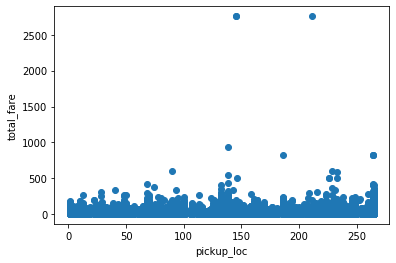

In [37]:
# graph is ploted between pickup_loc and total_fare

plt.scatter(X_train['pickup_loc'], Y_train)
plt.xlabel('pickup_loc')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

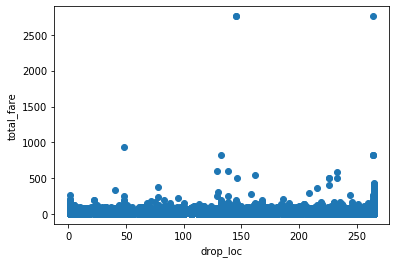

In [38]:
# graph is ploted between drop_loc and total_fare

plt.scatter(X_train['drop_loc'], Y_train)
plt.xlabel('drop_loc')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

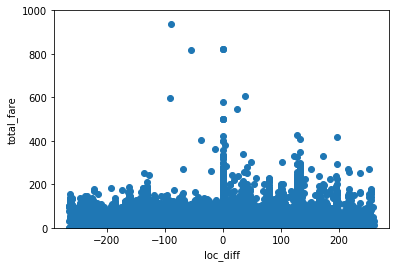

In [39]:
# graph is ploted between loc_diff and total_fare

plt.scatter(X_train['loc_diff'], Y_train)
plt.ylim(0,1000)
plt.xlabel('loc_diff')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

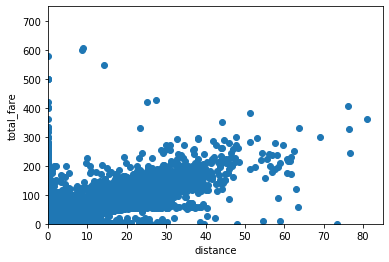

In [40]:
# graph is ploted between distance and total_fare

plt.scatter(X_train['distance'], Y_train)
plt.xlabel('distance')
plt.xlim(0,85)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

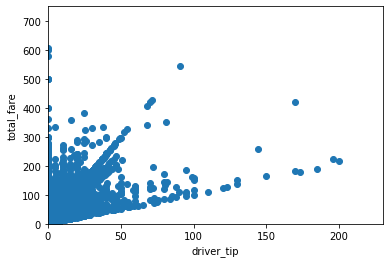

In [41]:
# graph is ploted between driver_tip and total_fare

plt.scatter(X_train['driver_tip'], Y_train)
plt.xlabel('driver_tip')
plt.xlim(0,230)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

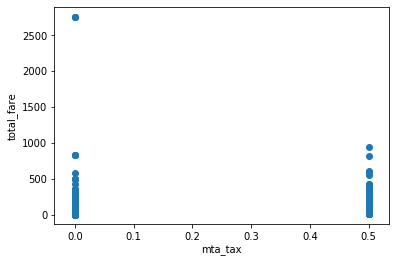

In [42]:
# graph is ploted between mta_tax and total_fare

plt.scatter(X_train['mta_tax'], Y_train)
plt.xlabel('mta_tax')
# plt.xlim(0,230)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

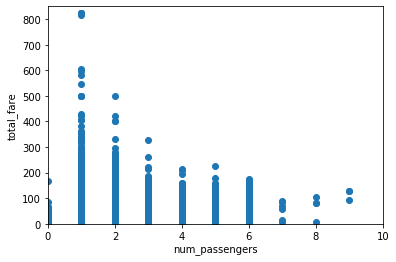

In [43]:
# graph is ploted between num_passengers and total_fare

plt.scatter(X_train['num_passengers'], Y_train)
plt.xlabel('num_passengers')
plt.xlim(0,10)
plt.ylim(0,850)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

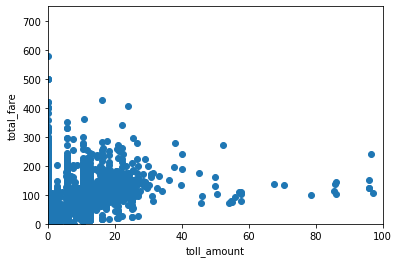

In [44]:
# graph is ploted between toll_amount and total_fare

plt.scatter(X_train['toll_amount'], Y_train)
plt.xlabel('toll_amount')
plt.xlim(0,100)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

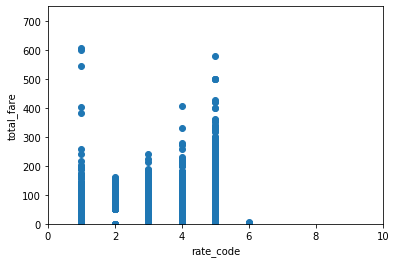

In [45]:
# graph is ploted between rate_code and total_fare

plt.scatter(X_train['rate_code'], Y_train)
plt.xlabel('rate_code')
plt.xlim(0,10)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

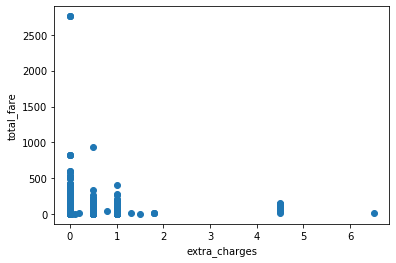

In [46]:
# graph is ploted between extra_charges and total_fare

plt.scatter(X_train['extra_charges'], Y_train)
plt.xlabel('extra_charges')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

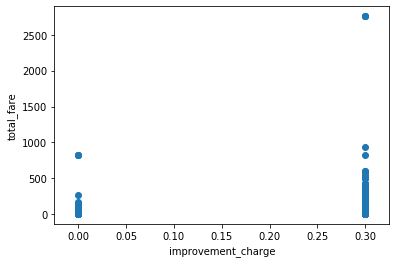

In [47]:
# graph is ploted between improvement and total_fare

plt.scatter(X_train['improvement_charge'], Y_train)
plt.xlabel('improvement_charge')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

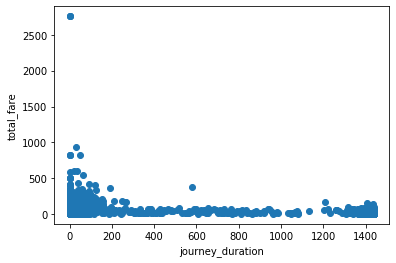

In [48]:
# graph is ploted between journey_duration and total_fare

plt.scatter(X_train['journey_duration'], Y_train)
plt.xlabel('journey_duration')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

### Manipulating X_train and X_test acccording to visulization

In [53]:
X_train.columns

Index(['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'num_passengers', 'toll_amount', 'payment_method',
       'rate_code', 'stored_flag', 'extra_charges', 'improvement_charge',
       'journey_duration', 'loc_diff', 'dist_sq', 'tip_sq', 'toll_sq',
       'rate_dist'],
      dtype='object')

In [54]:
# dependency found between distance, driver_tip, toll_amount
#So adding columns of it
X_train['dist_sq'] = X_train['distance'] * X_train['distance']
X_train['tip_sq'] = X_train['driver_tip'] * X_train['driver_tip']
X_train['toll_sq'] = X_train['toll_amount'] * X_train['toll_amount']
X_train['rate_dist'] = X_train['distance'] * X_train['rate_code']


C:\Users\Vedant Kale\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vedant Kale\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vedant Kale\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [55]:
# dependency found between distance, driver_tip, toll_amount
#So adding columns of it
X_test['dist_sq'] = X_test['distance'] * X_test['distance']
X_test['tip_sq'] = X_test['driver_tip'] * X_test['driver_tip']
X_test['toll_sq'] = X_test['toll_amount'] * X_test['toll_amount']
X_test['rate_dist'] = X_test['distance'] * X_test['rate_code']


In [56]:
X_train.head()

,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,journey_duration,loc_diff,dist_sq,tip_sq,toll_sq,rate_dist
0,1.0,170.0,233.0,1.83,0.5,0.70,1.0,0.0,1.0,1.0,0,1.0,0.3,5.350000,63.0,0.4900,3.3489,0.0,0.70
1,2.0,151.0,243.0,3.56,0.5,4.64,1.0,0.0,1.0,1.0,0,1.0,0.3,16.500000,92.0,21.5296,12.6736,0.0,4.64
2,2.0,68.0,90.0,1.50,0.5,1.29,2.0,0.0,1.0,1.0,0,0.0,0.3,6.283333,22.0,1.6641,2.2500,0.0,1.29
3,2.0,142.0,234.0,1.50,0.5,2.74,1.0,0.0,1.0,1.0,0,0.0,0.3,16.133333,92.0,7.5076,2.2500,0.0,2.74
4,2.0,238.0,238.0,0.00,0.5,0.45,6.0,0.0,2.0,1.0,0,0.0,0.3,2.700000,0.0,0.2025,0.0000,0.0,0.45


### Applying Models

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [58]:
#Applying Linear Regression model

model1 = linear_model.LinearRegression()

model1.fit(X_train, Y_train)

prediction1 = model1.predict(X_test)
prediction2 = model1.predict(X_train)

Y_test = prediction1

#plt.scatter(Y_test, prediction1)

model1.coef_

dframe_coef = pd.DataFrame(model1.coef_, X_train.columns, columns=['Coeifficent Values'])

dframe_coef

,Coeifficent Values
vendor_id,-9.845480e-03
pickup_loc,-2.962339e+09
drop_loc,2.962339e+09
driver_tip,1.617859e+00
mta_tax,-3.789024e+01
distance,2.639187e+00
num_passengers,2.574505e-03
toll_amount,8.836458e-01
payment_method,1.237871e+00
rate_code,1.185106e+00


In [59]:
# Applying Random Forest Regression Model

model2 = RandomForestRegressor()

model2.fit(X_train, Y_train)

prediction3 = model2.predict(X_test)
prediction4 = model2.predict(X_train)

Y_test = prediction3


C:\Users\Vedant Kale\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
# Root mean square of our prediction on X_train and Y_train is calculated for Linear Regression
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction2))
RMSR1

6.456544510842619

In [61]:
# Root mean square of our prediction on X_train and Y_train is calculated for Random Forest
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction4))
RMSR1

1.5307437367470846

In [70]:
# Root mean square of our prediction on X_train and Y_train is c Random Forest
RMSR1=np.sqrt(metrics.mean_squared_error(prediction2, prediction4))
RMSR1

5.872039145224871

In [65]:
# Converting and saving the predictions for Linear Regression

from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': prediction1,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_lin.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

            ID  total_amount
0            0      8.343671
1            1     11.519474
2            2     18.438692
3            3     10.094997
4            4      8.610808
5            5     10.860058
6            6     11.582404
7            7     12.701362
8            8      7.638422
9            9     11.675242
10          10     15.498174
11          11     13.337376
12          12     15.567552
13          13     15.329784
14          14     11.046407
15          15      7.586343
16          16     43.883109
17          17     11.645076
18          18      8.321073
19          19      8.486608
20          20     15.123282
21          21     11.869463
22          22      8.292847
23          23     48.042896
24          24     23.568412
25          25      9.923976
26          26     13.468730
27          27     18.861961
28          28     50.762851
29          29      7.230357
...        ...           ...
154205  154205     43.113247
154206  154206      7.119926
154207  154207

In [67]:
# Converting and saving the predictions for Random Forest Regression

from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': prediction3,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_rf.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

            ID  total_amount
0            0         7.300
1            1        15.350
2            2        17.759
3            3         8.750
4            4         7.800
5            5         9.120
6            6        11.558
7            7        15.360
8            8         8.700
9            9        12.350
10          10        20.964
11          11        14.865
12          12        23.450
13          13        22.400
14          14        10.350
15          15         5.850
16          16        41.470
17          17        11.804
18          18         6.600
19          19         5.850
20          20        18.650
21          21        13.560
22          22         7.300
23          23        46.810
24          24        23.953
25          25         8.500
26          26        15.866
27          27        16.550
28          28        54.422
29          29         4.700
...        ...           ...
154205  154205        42.960
154206  154206         4.750
154207  154207

In [69]:
# Converting and saving the mean of predictions for Linear Regression and Random Forest
from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': (prediction1+prediction3)/2 ,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_rf+lin.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

            ID  total_amount
0            0      7.821836
1            1     13.434737
2            2     18.098846
3            3      9.422498
4            4      8.205404
5            5      9.990029
6            6     11.570202
7            7     14.030681
8            8      8.169211
9            9     12.012621
10          10     18.231087
11          11     14.101188
12          12     19.508776
13          13     18.864892
14          14     10.698204
15          15      6.718172
16          16     42.676554
17          17     11.724538
18          18      7.460536
19          19      7.168304
20          20     16.886641
21          21     12.714731
22          22      7.796423
23          23     47.426448
24          24     23.760706
25          25      9.211988
26          26     14.667365
27          27     17.705981
28          28     52.592425
29          29      5.965179
...        ...           ...
154205  154205     43.036624
154206  154206      5.934963
154207  154207